In [1]:
import pandas as pd

In [210]:
songs_all = pd.read_csv("../data/songs_all.csv")

In [211]:
len(songs_all)

2440

In [22]:
songs_all["artist_1"] = songs_all["artist"].apply(lambda x: str(x[0]))

In [25]:
songs_all["artist_1"] = songs_all["artist"].apply(lambda x: str(x.strip('][').split(',')[0]))


In [28]:
songs_all["artist_2"] = songs_all["artist"].apply(lambda x: str(x.strip('][').split(',')[1]) if len(x.strip('][').split(',')) > 1 else None)

In [4]:
songs_all.columns

Index(['name', 'artist_1', 'artist_2', 'uri', 'duration_ms', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [212]:
songs_all = songs_all[['name', 'artist_1', 'artist_2', 'uri', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [34]:
songs_all.to_csv("../data/songs_all_10000.csv", index=False)

In [87]:
songs_all.head()

,name,artist_1,artist_2,uri,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,All Night Long (All Night) - Recorded at Spoti...,Benjamin Ingrosso,NaN,spotify:track:1I7arMzqZe0nxd9TfkG0Dt,188166,0.649,0.718,8,-7.101,0,0.0506,0.0106,0.000198,0.1170,0.715,112.049
1,Dancing in the Moonlight (feat. NEIMY),Jubël,NEIMY,spotify:track:5ow0sNF1zSqp71Ix5jEXWU,164010,0.659,0.617,11,-5.862,0,0.0649,0.2700,0.000000,0.1870,0.187,119.858
2,Dust,Matt Simons,Betty Who,spotify:track:0gp6wPoPamLLwYup5Rimba,198480,0.659,0.588,1,-9.905,1,0.0469,0.1510,0.000231,0.0918,0.574,92.037
3,H.O.L.Y.,Alle Farben,RHODES,spotify:track:61A5grQZlbqoCxVUWLI19v,174507,0.565,0.653,0,-5.846,0,0.0626,0.1950,0.000000,0.1910,0.471,100.051
4,Only Love,Deepend,NaN,spotify:track:7DSBxP0sGTuEb249LMJSLY,172222,0.647,0.810,2,-5.804,1,0.0521,0.0658,0.002360,0.2370,0.648,108.011


In [213]:
audio_features = songs_all[['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence']]

In [91]:
audio_features.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness
0,0.649,0.718,0.0506,0.0106,0.000198,0.1170
1,0.659,0.617,0.0649,0.2700,0.000000,0.1870
2,0.659,0.588,0.0469,0.1510,0.000231,0.0918
3,0.565,0.653,0.0626,0.1950,0.000000,0.1910
4,0.647,0.810,0.0521,0.0658,0.002360,0.2370


In [7]:
from sklearn.preprocessing import StandardScaler

In [214]:
scaler = StandardScaler()

In [215]:
audio_features_scaled = scaler.fit_transform(audio_features)

In [216]:
df_audio_features_scaled = pd.DataFrame(audio_features_scaled, columns=audio_features.columns)

In [217]:
df_audio_features_scaled.head()

,danceability,energy,acousticness,instrumentalness,valence
0,0.582443,0.653472,-1.062885,-0.618928,1.037422
1,0.630174,0.311861,-0.366455,-0.619460,-0.871490
2,0.630174,0.213774,-0.685943,-0.618839,0.527655
3,0.181503,0.433623,-0.567813,-0.619460,0.155273
4,0.572897,0.964642,-0.914686,-0.613108,0.795192


In [12]:
from sklearn.cluster import KMeans

In [233]:
my_kmeans = KMeans(n_clusters=5, random_state=1234)

In [234]:
my_kmeans.fit(audio_features_scaled)

KMeans(n_clusters=5, random_state=1234)

In [235]:
clusters = my_kmeans.predict(audio_features_scaled)

In [236]:
ser_clusters = pd.Series(clusters)

In [237]:
ser_clusters.value_counts()

2    765
0    682
1    549
3    354
4     90
dtype: int64

In [238]:
songs_all["cluster"] = clusters

In [131]:
songs_all.head()

,name,artist_1,artist_2,uri,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,All Night Long (All Night) - Recorded at Spoti...,Benjamin Ingrosso,NaN,spotify:track:1I7arMzqZe0nxd9TfkG0Dt,188166,0.649,0.718,8,-7.101,0,0.0506,0.0106,0.000198,0.1170,0.715,112.049,4
1,Dancing in the Moonlight (feat. NEIMY),Jubël,NEIMY,spotify:track:5ow0sNF1zSqp71Ix5jEXWU,164010,0.659,0.617,11,-5.862,0,0.0649,0.2700,0.000000,0.1870,0.187,119.858,4
2,Dust,Matt Simons,Betty Who,spotify:track:0gp6wPoPamLLwYup5Rimba,198480,0.659,0.588,1,-9.905,1,0.0469,0.1510,0.000231,0.0918,0.574,92.037,4
3,H.O.L.Y.,Alle Farben,RHODES,spotify:track:61A5grQZlbqoCxVUWLI19v,174507,0.565,0.653,0,-5.846,0,0.0626,0.1950,0.000000,0.1910,0.471,100.051,4
4,Only Love,Deepend,NaN,spotify:track:7DSBxP0sGTuEb249LMJSLY,172222,0.647,0.810,2,-5.804,1,0.0521,0.0658,0.002360,0.2370,0.648,108.011,1


In [132]:
songs_all.groupby(["cluster"]).mean()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,,,,
0,246371.128571,0.562471,0.682404,4.985714,-7.607657,0.614286,0.067587,0.263186,0.155866,0.695814,0.468130,121.700829
1,220423.340206,0.627595,0.755918,5.175258,-6.455096,0.659794,0.054384,0.141476,0.081048,0.323997,0.579477,121.817330
2,284628.513761,0.239694,0.097733,4.744954,-23.975077,0.686239,0.040740,0.919488,0.856749,0.114177,0.112116,98.371512
3,211677.627907,0.705384,0.713529,5.261628,-6.080494,0.622093,0.145701,0.178900,0.037192,0.129320,0.590924,121.609384
4,230275.154095,0.635194,0.710824,5.136853,-6.652876,0.692888,0.045620,0.136241,0.047868,0.109547,0.550950,121.738930
5,207839.239130,0.658826,0.669848,5.260870,-7.029804,0.673913,0.325804,0.289296,0.035005,0.183715,0.534370,124.794826
6,246580.492268,0.495072,0.377093,4.860825,-10.571621,0.840206,0.039880,0.671705,0.019860,0.133070,0.372280,119.570080


In [133]:
my_kmeans.inertia_

3419.0300324981713

In [224]:
# Try to run Kmeans with all values of K, from 2 to 20
K = range(2, 20)

# For each model, store the inertia in a list
inertia = []
for k in K:
    my_kmeans_2 = KMeans(n_clusters=k, random_state=1234)
    my_kmeans_2.fit(audio_features_scaled)
    inertia.append(my_kmeans_2.inertia_)
    print(str(k), " --> ", str(my_kmeans_2.inertia_))

2  -->  4784.221294642041
3  -->  3572.2792754706816
4  -->  2828.410466064967
5  -->  2565.6559300531744
6  -->  2366.5455731616958
7  -->  2129.0219017143486
8  -->  1978.5808095606833
9  -->  1835.7385421778217
10  -->  1729.596699539187
11  -->  1638.091771873091
12  -->  1565.1977010310595
13  -->  1509.0410012050513
14  -->  1460.2407423357365
15  -->  1411.874751532943
16  -->  1360.5495444960359
17  -->  1314.8216640381345
18  -->  1280.0471752119338
19  -->  1236.7915902926184


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

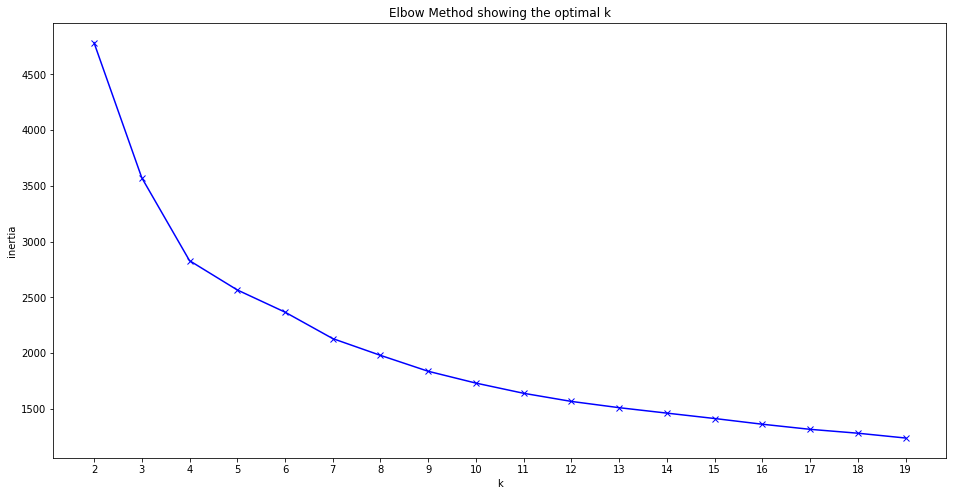

In [225]:
# Plot the results
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [226]:
from sklearn.metrics import silhouette_score

# repeat the same process, now with the silhouette score
K = range(2, 20)
silhouette = []
for k in K:
    my_kmeans_2 = KMeans(n_clusters=k, random_state=1234)
    clusters = my_kmeans_2.fit_predict(audio_features_scaled)
    silhouette_avg = silhouette_score(audio_features_scaled, clusters)
    silhouette.append(silhouette_avg)
    print(str(k), " --> ", str(silhouette_avg))

2  -->  0.5578852024464002
3  -->  0.38331076397490565
4  -->  0.356865360462187
5  -->  0.366394587861656
6  -->  0.31930770634486005
7  -->  0.32415173683711773
8  -->  0.3162425518947683
9  -->  0.26195579268769076
10  -->  0.2615642904384614
11  -->  0.2590483612565826
12  -->  0.24604314965094645
13  -->  0.24446778301206679
14  -->  0.23886706088019588
15  -->  0.21749691237322674
16  -->  0.22031399121520986
17  -->  0.22504881149920944
18  -->  0.22282145284936136
19  -->  0.22647861108672665


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

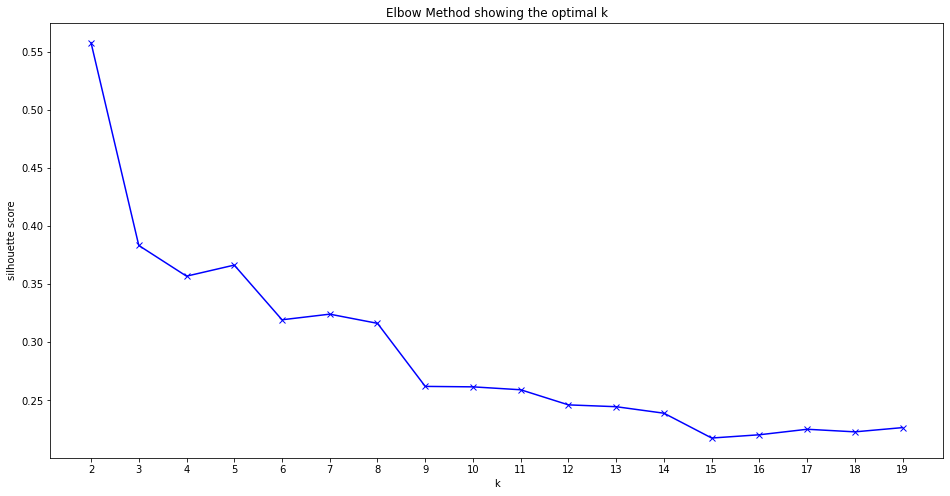

In [227]:
# plot
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [109]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [229]:
db = DBSCAN(eps=0.6, min_samples=10).fit(audio_features_scaled)

In [230]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [231]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(audio_features_scaled, labels))

Estimated number of clusters: 1
Estimated number of noise points: 202
Silhouette Coefficient: 0.093


In [113]:
from numpy import arange

In [232]:
K = arange(0.3, 2.0, 0.1000)
silhouette = []
for k in K:
    db = DBSCAN(eps=k, min_samples=10).fit(audio_features_scaled)
    labels = db.labels_
    silhouette_avg = metrics.silhouette_score(audio_features_scaled, labels)
    silhouette.append(silhouette_avg)
    print(str(k), " --> ", str(silhouette_avg))

0.3  -->  -0.07039138033836201
0.4  -->  -0.035746169123813024
0.5  -->  0.049666941726040297
0.6000000000000001  -->  0.09321237144514607
0.7000000000000002  -->  0.04698467024078914
0.8000000000000003  -->  0.1036243310337064
0.9000000000000001  -->  0.11935202267304248
1.0000000000000002  -->  0.0886701877111927
1.1000000000000003  -->  0.08459935114210482
1.2000000000000004  -->  0.12059139082849069
1.3000000000000005  -->  0.032706478709709115


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

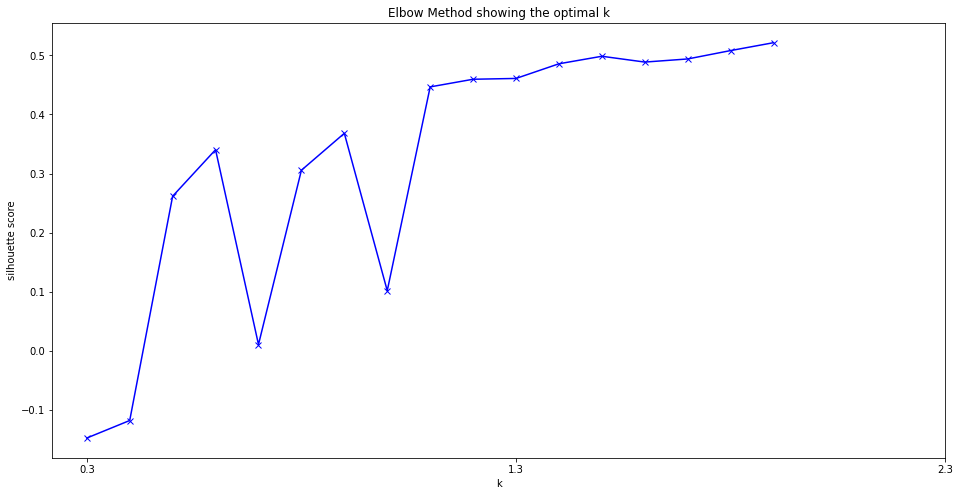

In [115]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [134]:
import spotipy # install if needed
from spotipy.oauth2 import SpotifyClientCredentials
import webbrowser
import numpy as np

In [135]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="af9ddcc5c792418e989d0746d5f123ea",
    client_secret="042754efae2146c8adcd80bf6811c3f0"))

In [136]:
def get_all_song():
    user_input = input("Song: ")
    results = sp.search(user_input, limit=1)
    for i in range(len(results["tracks"]["items"][0]["artists"])):
        print("Artist:",results["tracks"]["items"][0]["artists"][i]["name"])
    url = results["tracks"]["items"][0]["external_urls"]["spotify"]
    print("URL:", url)
    #webbrowser.open(url)

In [137]:
get_all_song()

Song: Mamma Mia
Artist: ABBA
URL: https://open.spotify.com/track/4wCpXupYoAJHsPwnc546ZJ


In [152]:
song_a_f = sp.audio_features("https://open.spotify.com/track/4wCpXupYoAJHsPwnc546ZJ")[0].values()

In [139]:
keys = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
            'time_signature']

list_a_f = list(song_a_f)

In [140]:
keys_ = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']

In [141]:
df_a_f = pd.DataFrame(columns=keys)

df_a_f.loc[0] = list_a_f

In [142]:
df_a_f_ = df_a_f[keys_]

In [143]:
df_a_f_.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness
0,0.739,0.806,0.0309,0.255,0.000176,0.442


In [144]:
df_a_f_scaled = scaler.transform(df_a_f_)

In [145]:
df_a_f_scaled

array([[ 1.01202188,  0.95111262, -0.5316423 , -0.40672706, -0.61898672,
         2.17555119]])

In [146]:
cluster = my_kmeans.predict(df_a_f_scaled)

In [167]:
int(cluster)

1

In [148]:
songs_all.loc[songs_all["cluster"] == 1, ["name", "artist_1"]]

,name,artist_1
4,Only Love,Deepend
9,This City - Frank Walker Remix,Sam Fischer
12,Enemy,Sandro Cavazza
14,All For Love,Tungevaag
30,Something I Need,OneRepublic
...,...,...
2418,Blackbird,Fat Freddy's Drop
2419,What It Is,Mark Knopfler
2423,Russia - Nightmares on Wax Remix,Fat Freddy's Drop
2438,Johnny B. Goode,Chuck Berry


In [164]:
from os import listdir
from os.path import isfile, join
mypath = "../data/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [165]:
onlyfiles

['songs.csv',
 '.DS_Store',
 'songs_all_20210128.csv',
 'hot_top100_2021-01-26.csv',
 'songs_all.csv',
 'songs_all_10000.csv',
 'audio_features.csv']

In [166]:
"hot_top100_2021-01-26.csv" in onlyfiles

True

In [182]:
song_matches = songs_all.loc[songs_all["cluster"] == int(cluster), ["name","artist_1","artist_2","uri"]]

In [175]:
from random import randint

In [183]:
value = randint(0, len(song_matches))

In [185]:
song_matches

,name,artist_1,artist_2,uri
4,Only Love,Deepend,NaN,spotify:track:7DSBxP0sGTuEb249LMJSLY
9,This City - Frank Walker Remix,Sam Fischer,Frank Walker,spotify:track:5SN8Y8Q430cJL4kqboNYlf
12,Enemy,Sandro Cavazza,NaN,spotify:track:3YOl49rulPzu6LHbeDicuT
14,All For Love,Tungevaag,Raaban,spotify:track:5VGBgPVFO3e0lWz4WHYntQ
30,Something I Need,OneRepublic,NaN,spotify:track:5aIZ2jtxZ4o4GHQXTybkIa
...,...,...,...,...
2418,Blackbird,Fat Freddy's Drop,NaN,spotify:track:3oSnMDaL0WsWyp2Gy80ulq
2419,What It Is,Mark Knopfler,NaN,spotify:track:65f8Ca4HbZCMLhpZPTHW4O
2423,Russia - Nightmares on Wax Remix,Fat Freddy's Drop,Nightmares On Wax,spotify:track:6fXznH7uiIWOs53BwRtgPz
2438,Johnny B. Goode,Chuck Berry,NaN,spotify:track:2QfiRTz5Yc8DdShCxG1tB2


In [189]:
list_index = list(song_matches.index)

In [190]:
list_index

[4,
 9,
 12,
 14,
 30,
 49,
 50,
 54,
 56,
 57,
 58,
 59,
 62,
 63,
 68,
 73,
 75,
 82,
 91,
 95,
 99,
 107,
 108,
 110,
 114,
 115,
 121,
 122,
 127,
 135,
 137,
 141,
 148,
 158,
 166,
 167,
 170,
 173,
 178,
 185,
 188,
 189,
 190,
 195,
 197,
 203,
 214,
 215,
 220,
 223,
 228,
 235,
 237,
 238,
 239,
 240,
 241,
 252,
 258,
 262,
 267,
 270,
 276,
 278,
 294,
 303,
 313,
 364,
 491,
 514,
 516,
 529,
 534,
 536,
 541,
 547,
 552,
 560,
 566,
 570,
 575,
 582,
 590,
 592,
 600,
 601,
 610,
 615,
 627,
 629,
 641,
 642,
 660,
 753,
 754,
 756,
 757,
 762,
 769,
 774,
 777,
 778,
 783,
 785,
 794,
 797,
 806,
 810,
 814,
 819,
 823,
 831,
 832,
 835,
 837,
 839,
 843,
 864,
 866,
 867,
 871,
 878,
 881,
 893,
 913,
 920,
 928,
 936,
 947,
 955,
 957,
 970,
 976,
 977,
 990,
 992,
 993,
 997,
 1047,
 1048,
 1049,
 1057,
 1058,
 1065,
 1066,
 1067,
 1068,
 1075,
 1077,
 1083,
 1091,
 1092,
 1093,
 1115,
 1122,
 1123,
 1124,
 1125,
 1129,
 1133,
 1134,
 1143,
 1149,
 1151,
 1152,
 1154,

In [244]:
recommended_song_uri = "spotify:track:5VGBgPVFO3e0lWz4WHYntQ"

In [245]:
results = sp.search(recommended_song_uri, limit=10)
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=spotify%3Atrack%3A5VGBgPVFO3e0lWz4WHYntQ&type=track&offset=0&limit=10',
  'items': [],
  'limit': 10,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0}}

In [205]:
recommended_song_name = songs_all.loc[songs_all["uri"] == recommended_song_uri, ["name"]]

In [209]:
recommended_song_name.values[0][0]

'What It Is'

In [262]:
path = "/Users/pauserrabergeron/Private/Ironhack/Course/credentials/"
f = open(path + "spotify_credentials.txt", "r")
dicti = f.read()

In [263]:
res = json.loads(dicti[:-1])

In [264]:
res

{'client_id': 'af9ddcc5c792418e989d0746d5f123ea',
 'client_secret': '042754efae2146c8adcd80bf6811c3f0'}